# Data Analysis

In [1]:
# Importation of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from itertools import combinations

In [2]:
# Importing database
df = pd.read_csv("../database/data.csv", sep=";")
df.head()

,code_op,nom_op,num_site,id_site_partage,id_station_anfr,x,y,latitude,longitude,nom_reg,...,site_ZB,site_DCC,site_strategique,site_capa_240mbps,date_ouverturecommerciale_5g,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
0,20801,Orange,00000001A1,NaN,0802290015,687035,6985761,"49,97028","2,81944",Hauts-de-France,...,0,0,0,0,NaN,0,0,0,0,0
1,20801,Orange,00000001B1,NaN,0642290151,422853,6249263,"43,28861","-0,41389",Nouvelle-Aquitaine,...,0,0,0,1,2020-12-14,0,0,0,1,0
2,20801,Orange,00000001B2,NaN,0332290026,416932,6422196,"44,84112","-0,58333",Nouvelle-Aquitaine,...,0,0,0,1,2021-02-22,0,0,0,0,1
3,20801,Orange,00000001B3,NaN,0472290005,511106,6349234,"44,21666","0,63556",Nouvelle-Aquitaine,...,0,0,0,1,NaN,0,0,0,0,0
4,20801,Orange,00000001C1,NaN,0512290147,836824,6889450,"49,09028","4,87333",Grand Est,...,0,0,0,1,NaN,0,0,0,0,0


## Important facts about database

In [3]:
sites = list(df["num_site"])
nb_sit = len(sites)

regions = list(np.unique(df["nom_reg"]))
nb_reg = len(regions)

departments = list(np.unique(df["nom_dep"]))
nb_dep = len(departments)

cities = list(np.unique(df["nom_com"]))
nb_cit = len(cities)

providers = list(np.unique(df["nom_op"]))
nb_pro = len(providers)

# print(nb_sit) # number of sites

# print(nb_sit/nb_reg) # mean number of sites per region

# print(nb_sit/nb_dep) # mean number of sites per department

# print(nb_sit/nb_cit) # mean number of sites per city

# for reg in regions: # number of sites per region
    # print(reg + " : " + str(list(df["nom_reg"]).count(reg)))

# for dep in departments: # number of sites per department
#     print(dep + " : " + str(list(df["nom_dep"]).count(dep)))

# for pro in providers: # number of sites per provider
#     print(pro + " : " + str(list(df["nom_op"]).count(pro)))

# for cit in cities: # number of sites per cities (for cities with a number >= 20)
    # count = list(df["nom_com"]).count(cit)
#     if (count >= 20):
#         nb_cit += 1
#         print(cit + " : " + str(count))

df_proPerReg = pd.DataFrame({
    "nom_reg" : regions,
    "Free Mobile" : [None for i in range(nb_reg)],
    "SFR" : [None for i in range(nb_reg)],
    "Orange" : [None for i in range(nb_reg)],
    "Bouygues Telecom" : [None for i in range(nb_reg)],
    "Total" : [None for i in range(nb_reg)]
})

for reg in regions: # number of sites per region per provider
    for pro in providers:
        count = list(df.loc[df["nom_reg"]==reg, "nom_op"]).count(pro)
        df_proPerReg.loc[df_proPerReg["nom_reg"]==reg, pro] = count
        # print(reg + ", " + pro + " : " + str(count))
    df_proPerReg.loc[df_proPerReg["nom_reg"]==reg, "Total"] = list(df["nom_reg"]).count(reg)

df_proPerDep = pd.DataFrame({
    "nom_dep" : departments,
    "Free Mobile" : [None for i in range(nb_dep)],
    "SFR" : [None for i in range(nb_dep)],
    "Orange" : [None for i in range(nb_dep)],
    "Bouygues Telecom" : [None for i in range(nb_dep)],
    "Total" : [None for i in range(nb_dep)]
})

for dep in departments: # number of sites per department per provider
    for pro in providers:
        count = list(df.loc[df["nom_dep"]==dep, "nom_op"]).count(pro)
        df_proPerDep.loc[df_proPerDep["nom_dep"]==dep, pro] = count
    df_proPerDep.loc[df_proPerDep["nom_dep"]==dep, "Total"] = list(df["nom_dep"]).count(dep)

In [4]:
df_proPerReg

,nom_reg,Free Mobile,SFR,Orange,Bouygues Telecom,Total
0,Auvergne-Rhône-Alpes,3563,3665,3963,3678,14869
1,Bourgogne-Franche-Comté,2025,1834,2077,1807,7743
2,Bretagne,1165,1162,1563,1148,5038
3,Centre-Val de Loire,1255,1151,1423,1163,4992
4,Corse,221,306,305,298,1130
5,Grand Est,2750,2661,3186,2659,11256
6,Hauts-de-France,2115,1808,2580,1931,8434
7,Normandie,1211,1165,1456,1137,4969
8,Nouvelle-Aquitaine,2880,2777,3403,2743,11803
9,Occitanie,2778,2955,3486,2933,12152


In [5]:
nb_sit_2g = sum(df["site_2g"])
print(nb_sit_2g)

nb_sit_3g = sum(df["site_3g"])
print(nb_sit_3g)

nb_sit_4g = sum(df["site_4g"])
print(nb_sit_4g)

nb_sit_5g = sum(df["site_5g"])
print(nb_sit_5g)

60638
107753
108399
49640


In [6]:
total_bold = "__Total__"

In [7]:
df_proAndTechno = pd.DataFrame({
    "Opérateur" : [pro for pro in providers]
})

In [8]:
# for pro in providers:
#     df_proAndTechno = pd.concat([df_proAndTechno,pd.DataFrame({'Opérateur' : pro})])
df_proAndTechno = pd.concat([df_proAndTechno,pd.DataFrame({'Opérateur' : total_bold},index=[4])])

In [9]:
df_proAndTechno

,Opérateur
0,Bouygues Telecom
1,Free Mobile
2,Orange
3,SFR
4,__Total__


In [10]:
for i in range(2, 6): # techno 2, 3, 4, 5G
    tmp = list(range(2, 6))
    tmp.remove(i)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{i}G"] = sum(df.loc[(df[f"site_{tmp[0]}g"]==0) & (df[f"site_{tmp[1]}g"]==0) & (df[f"site_{tmp[2]}g"]==0) & (df['nom_op']==pro), f"site_{i}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{i}G"] = sum(df_proAndTechno[f"{i}G"][:-1])

In [11]:
def create_tmp(cmb: combinations):
    tmp = list(range(2, 6))
    for rm_tmp in cmb:
        tmp.remove(rm_tmp)
    
    return tmp

In [12]:
# for nb_comb in range(2, 5):
for cmb in combinations(range(2, 6), 2):
    tmp = create_tmp(cmb)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{cmb[0]}-{cmb[1]}G"] = sum(df.loc[(df[f"site_{tmp[0]}g"]==0) & (df[f"site_{tmp[1]}g"]==0) & (df[f"site_{cmb[0]}g"]==1) & (df[f"site_{cmb[1]}g"]==1) & (df['nom_op']==pro), f"site_{cmb[0]}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{cmb[0]}-{cmb[1]}G"] = sum(df_proAndTechno[f"{cmb[0]}-{cmb[1]}G"][:-1])

for cmb in combinations(range(2, 6), 3):
    tmp = create_tmp(cmb)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{cmb[0]}-{cmb[1]}-{cmb[2]}G"] = sum(df.loc[(df[f"site_{tmp[0]}g"]==0) & (df[f"site_{cmb[0]}g"]==1) & (df[f"site_{cmb[1]}g"]==1) & (df[f"site_{cmb[2]}g"]==1) & (df['nom_op']==pro), f"site_{cmb[0]}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{cmb[0]}-{cmb[1]}-{cmb[2]}G"] = sum(df_proAndTechno[f"{cmb[0]}-{cmb[1]}-{cmb[2]}G"][:-1])

for cmb in combinations(range(2, 6), 4):
    tmp = create_tmp(cmb)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{cmb[0]}-{cmb[1]}-{cmb[2]}-{cmb[3]}G"] = sum(df.loc[(df[f"site_{cmb[0]}g"]==1) & (df[f"site_{cmb[1]}g"]==1) & (df[f"site_{cmb[2]}g"]==1) & (df[f"site_{cmb[3]}g"]==1) & (df['nom_op']==pro), f"site_{cmb[0]}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{cmb[0]}-{cmb[1]}-{cmb[2]}-{cmb[3]}G"] = sum(df_proAndTechno[f"{cmb[0]}-{cmb[1]}-{cmb[2]}-{cmb[3]}G"][:-1])

In [13]:
for i in df_proAndTechno.columns[1:]:
    df_proAndTechno[i] = df_proAndTechno[i].astype(int)

In [14]:
df_proAndTechno["Total"] = df_proAndTechno[df_proAndTechno.columns[1:]].sum(axis=1)

In [15]:
df_proAndTechno

,Opérateur,2G,3G,4G,5G,2-3G,2-4G,2-5G,3-4G,3-5G,4-5G,2-3-4G,2-3-5G,2-4-5G,3-4-5G,2-3-4-5G,Total
0,Bouygues Telecom,4,30,15,0,66,12,0,3889,0,6,11044,0,0,681,10584,26331
1,Free Mobile,0,102,15,0,0,0,0,7225,0,0,0,0,0,18607,0,25949
2,Orange,10,65,602,3,21,63,0,9288,0,109,11697,1,5,1638,7038,30540
3,SFR,20,37,106,0,80,67,0,4909,0,38,9831,0,10,835,10085,26018
4,__Total__,34,234,738,3,167,142,0,25311,0,153,32572,1,15,21761,27707,108838


In [16]:
df_techno = pd.DataFrame({
    "Opérateur" : [pro for pro in providers]
})
df_techno = pd.concat([df_techno,pd.DataFrame({'Opérateur' : total_bold},index=[4])])
for i in range(2, 6):
    for pro in providers:
        df_techno.loc[df_techno['Opérateur']==pro, f"avec_{i}G"] = sum(df.loc[df['nom_op']==pro, f"site_{i}g"])
    df_techno.loc[df_techno['Opérateur']==total_bold, f"avec_{i}G"] = sum(df_techno[f"avec_{i}G"][:-1])
df_techno["Total"] = df_techno[df_techno.columns[1:]].sum(axis=1)
for i in df_techno.columns[1:]:
    df_techno[i] = df_techno[i].astype(int)
df_techno

,Opérateur,avec_2G,avec_3G,avec_4G,avec_5G,Total
0,Bouygues Telecom,21710,26294,26231,11271,85506
1,Free Mobile,0,25934,25847,18607,70388
2,Orange,18835,29748,30440,8794,87817
3,SFR,20093,25777,25881,10968,82719
4,__Total__,60638,107753,108399,49640,326430


## Barplots

### Color palettes

In [17]:
color_pal_pro = {'Orange':'#fc5603','SFR':'#169e26','Bouygues Telecom':'#035afc', 'Free Mobile':'#dbd640'}
# color_pal_tec = {"2G":' #4285F4',"3G":'#34A853',"4G":'#FBBC05', "5G":' #EA4335'}

### DataFrame creation for easier plots

In [18]:
def easyPlotting_df(df):
    array_index = [list(df['Opérateur'][:-1]), list(df.columns[1:])]
    index=pd.MultiIndex.from_product(array_index, names=["nom_op", "techno"])

    df_easy = pd.DataFrame(index=index)
    for pro in providers:
        for techno in list(df.columns[1:]):
            df_easy.loc[(pro,techno), 'number'] = df.loc[df['Opérateur']==pro, techno].iloc[0]
    df_easy['number'] = df_easy['number'].astype(int)

    return df_easy

### Definition of a helpful fonction for plotting the dataFrames above

In [19]:
def pretty_barPlot(df):
    sns.set_context('paper') # size of ticks labels
    sns.set_theme(style="whitegrid") # style of the backgroung
    g = sns.catplot(
        data=easyPlotting_df(df),
        kind='bar',
        x='nom_op',
        y='number',
        col='techno',
        hue='nom_op',
        palette=color_pal_pro
    )
    g.tick_params(axis='x', rotation=15)

### Number of sites with at least the $x$ G technology ($x\in\{2,\dots,5\}$)

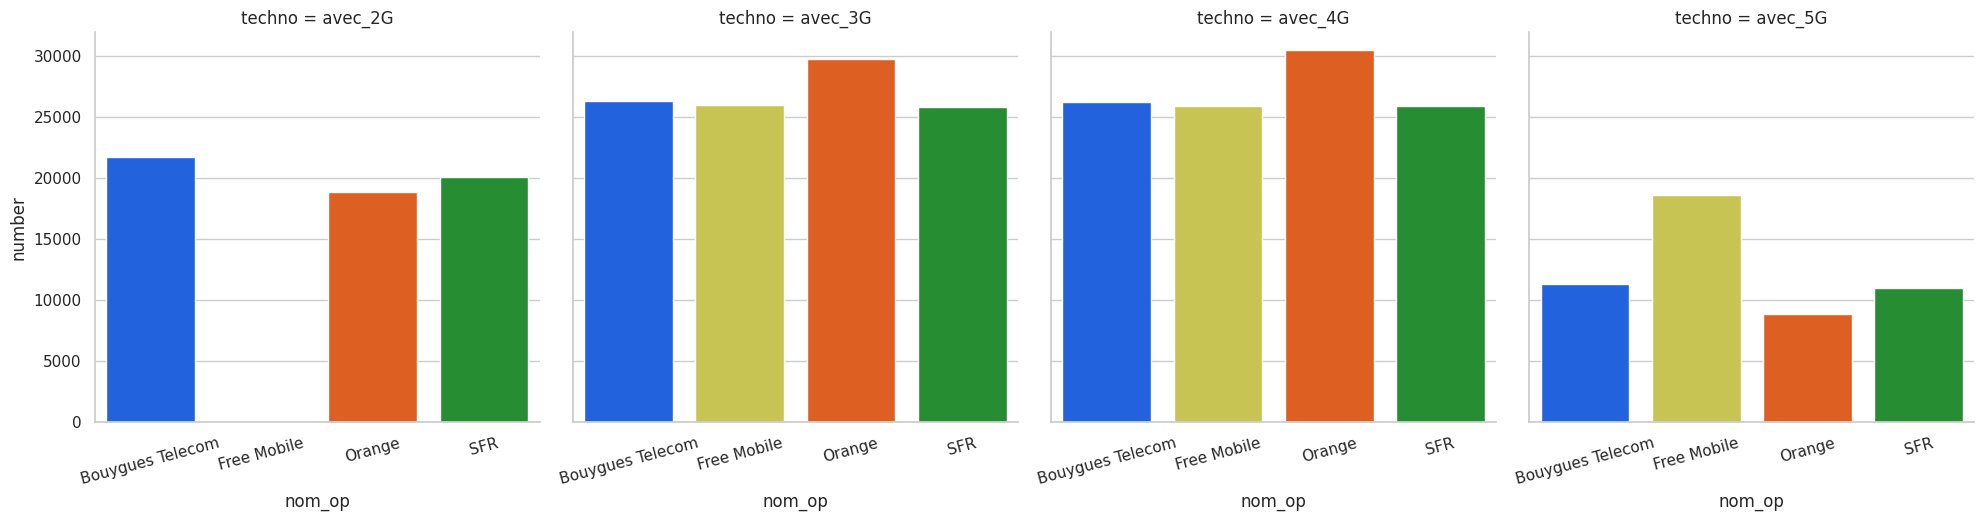

In [29]:
pretty_barPlot(df_techno.loc[:, :'avec_5G'])

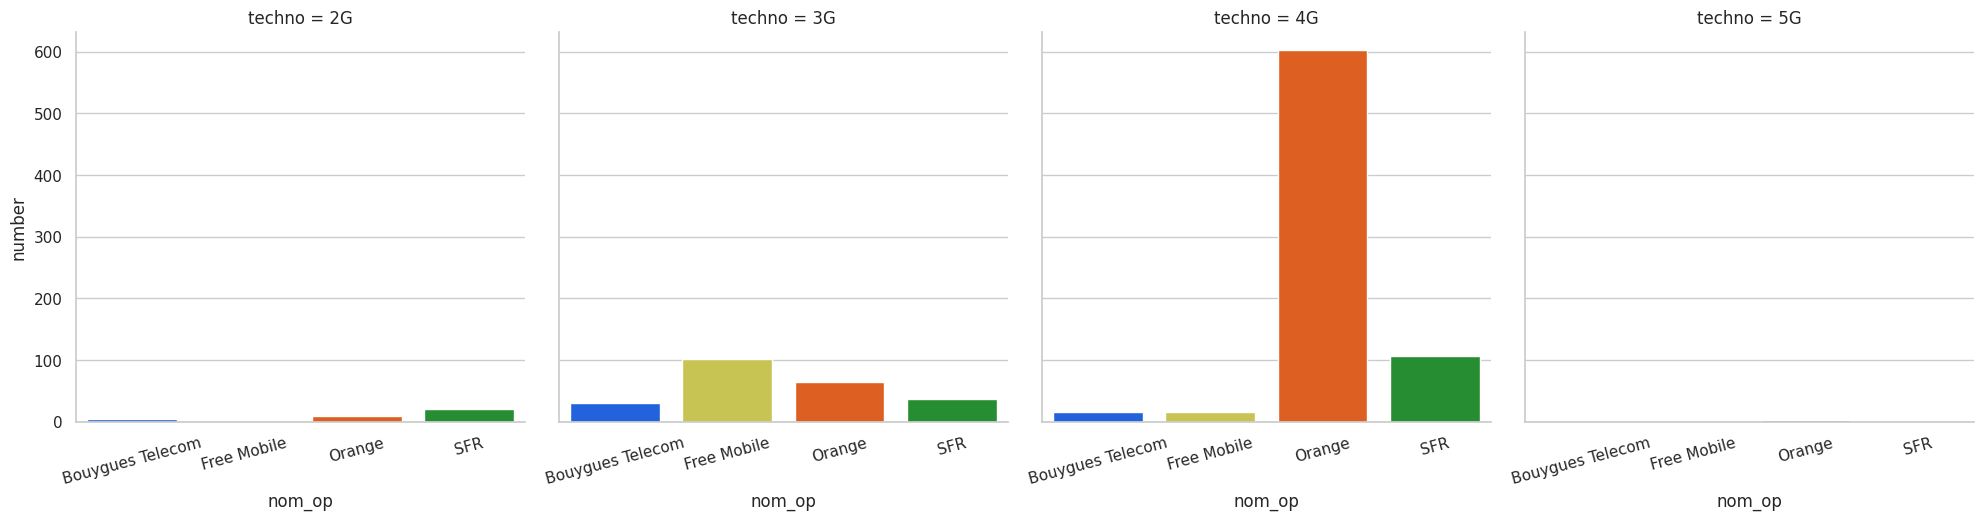

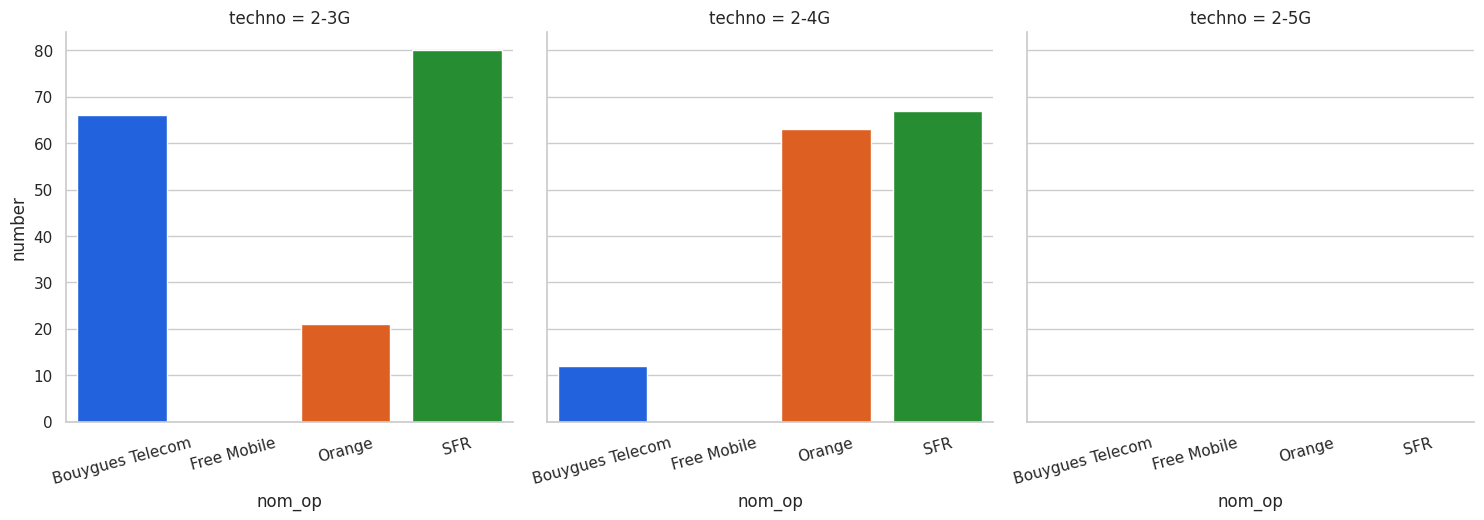

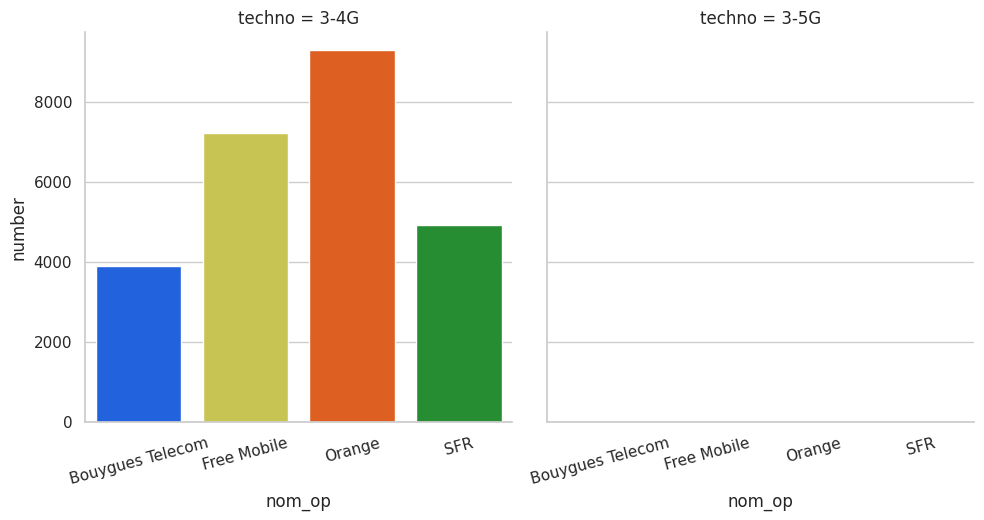

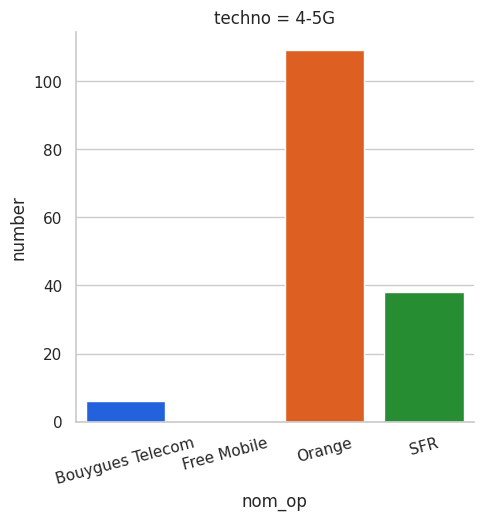

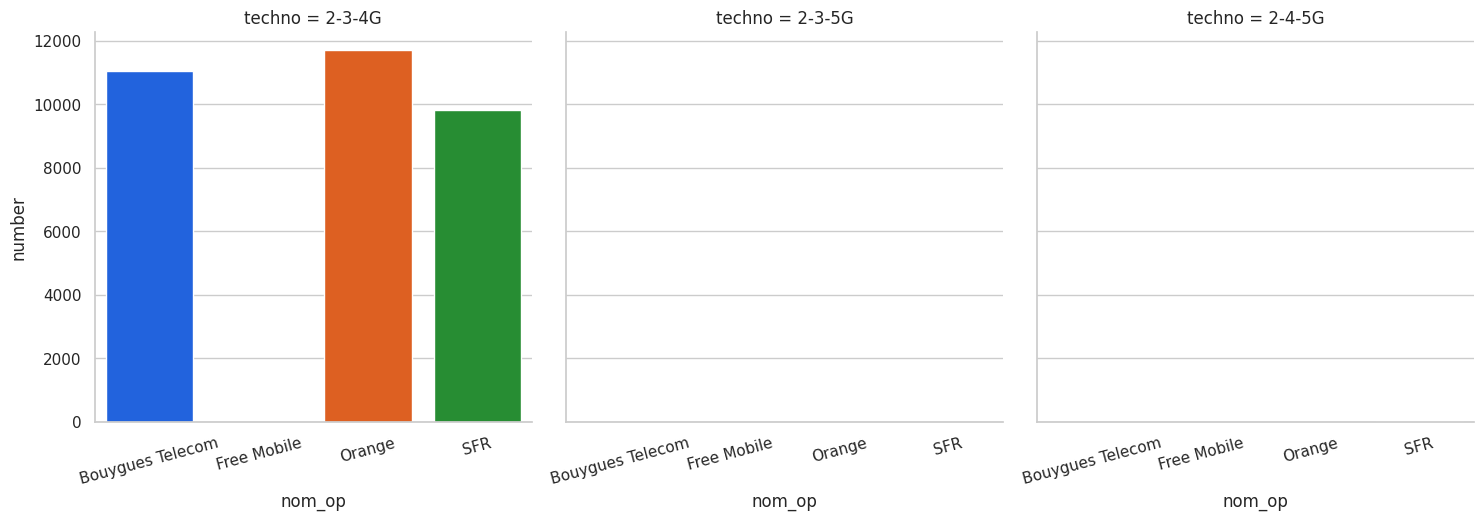

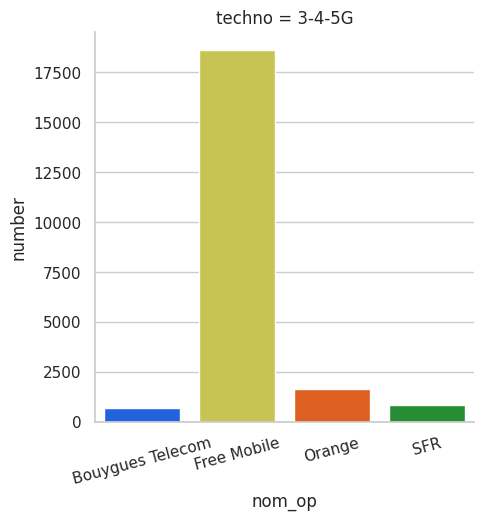

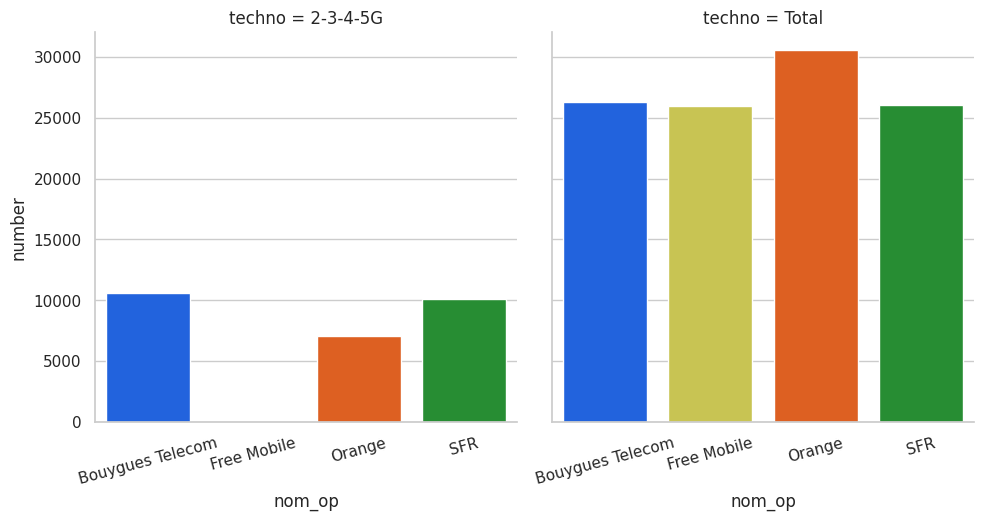

In [21]:
pretty_barPlot(df_proAndTechno.iloc[:, [0,1,2,3,4]])
pretty_barPlot(df_proAndTechno.iloc[:, [0,5,6,7]])
pretty_barPlot(df_proAndTechno.iloc[:, [0,8,9]])
pretty_barPlot(df_proAndTechno.iloc[:, [0,10]])
pretty_barPlot(df_proAndTechno.iloc[:, [0,11,12,13]])
pretty_barPlot(df_proAndTechno.iloc[:, [0,14]])
pretty_barPlot(df_proAndTechno.iloc[:, [0,15,16]])

## File exportation

In [22]:
results = open("data_numbers.md", "w")

results.write("# Analyse des données\n")

results.write("## Description des champs :\n cf. https://data.arcep.fr/mobile/sites/\n")

results.write("## Chiffres sur les stations de base :\n")

results.write("### Chiffres généraux :\n")
results.write("|||\n|---|---:|\n")
results.write("| Stations de base | " + str(nb_sit) + " | \n")
results.write("| Stations de base/région (moyenne) | " + str(round(nb_sit/nb_reg)) + " |\n")
results.write("| Stations de base/département (moyenne) | " + str(round(nb_sit/nb_dep)) + " |\n")
results.write("| Stations de base/ville (moyenne) | " + str(round(nb_sit/nb_cit)) + " |\n")

results.write("### Stations par opérateurs :\n")
results.write("|Opérateur|Nb de stations|\n|---|---:|\n")
for pro in np.unique(providers):
    results.write("| " + pro + " | " + str(list(df["nom_op"]).count(pro)) + " | \n")

results.write("### Stations par régions, par opérateurs :\n")
results.write(df_proPerReg.to_markdown(index=False) + "\n")

results.write("### Stations par départements, par opérateurs :\n")
results.write(df_proPerDep.to_markdown(index=False) + "\n")

results.write("### Type de réseau :\n")
results.write(df_techno.to_markdown(index=False) + "\n")

results.write("### Stations par technologies, par opérateurs :\n")
results.write(df_proAndTechno.to_markdown(index=False) + "\n")

results.close()

# Contents of the database

In [23]:
# print(df.dtypes)

In [24]:
# for col_name in df.columns:
#     print(col_name + " : " + str(df[col_name].dtype) + " (" + str(df[col_name].notnull().count()) + ")")